In [7]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
''')
conn.commit()


In [9]:
sales_data = [
    ("Apple", 10, 2.5),
    ("Banana", 5, 1.0),
    ("Orange", 3, 3.0),
    ("Apple", 7, 2.5),
    ("Banana", 8, 1.0),
    ("Grapes", 4, 4.0),
    ("Orange", 2, 3.0),
    ("Apple", 6, 2.5),
    ("Banana", 9, 1.0),
    ("Grapes", 5, 4.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sales_data)
conn.commit()


In [10]:
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM 
    sales 
GROUP BY 
    product
"""

df = pd.read_sql_query(query, conn)

conn.close()


In [11]:
print("Sales Summary:")
print(df)


Sales Summary:
  product  total_qty  revenue
0   Apple         46    115.0
1  Banana         44     44.0
2  Grapes         18     72.0
3  Orange         10     30.0


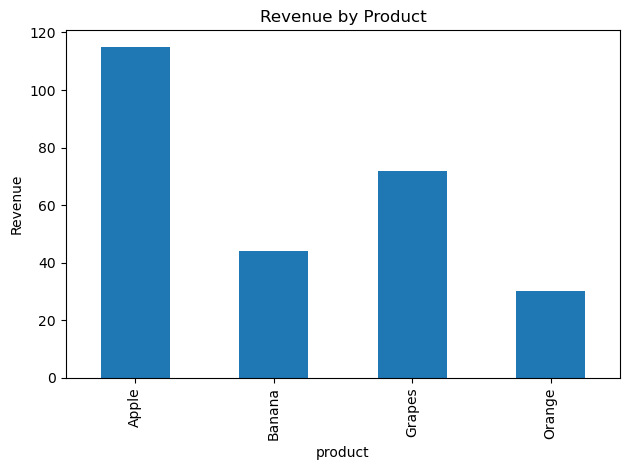

In [12]:
df.plot(kind='bar', x='product', y='revenue', title='Revenue by Product', legend=False)
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png") 
plt.show()


In [13]:
query_qty = """
SELECT 
    product, 
    SUM(quantity) AS total_quantity 
FROM 
    sales 
GROUP BY 
    product
"""

df_qty = pd.read_sql_query(query_qty, sqlite3.connect("sales_data.db"))
print("Total Quantity by Product:")
print(df_qty)


Total Quantity by Product:
  product  total_quantity
0   Apple              46
1  Banana              44
2  Grapes              18
3  Orange              10


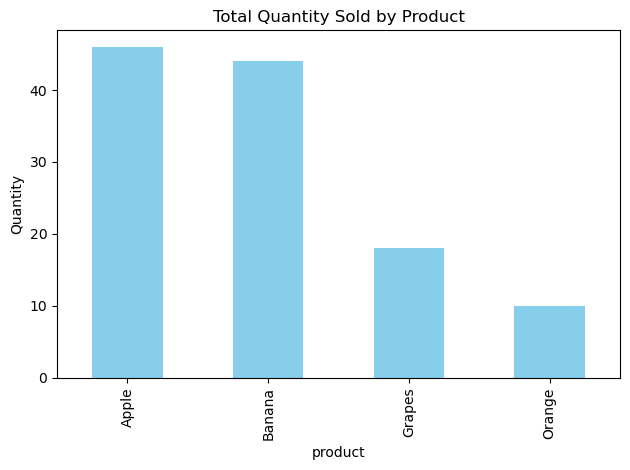

In [14]:
df_qty.plot(kind='bar', x='product', y='total_quantity', title='Total Quantity Sold by Product', legend=False, color='skyblue')
plt.ylabel("Quantity")
plt.tight_layout()
plt.show()


In [15]:
query_avg_price = """
SELECT 
    product, 
    ROUND(AVG(price), 2) AS avg_price 
FROM 
    sales 
GROUP BY 
    product
"""

df_avg_price = pd.read_sql_query(query_avg_price, sqlite3.connect("sales_data.db"))
print("Average Price by Product:")
print(df_avg_price)


Average Price by Product:
  product  avg_price
0   Apple        2.5
1  Banana        1.0
2  Grapes        4.0
3  Orange        3.0


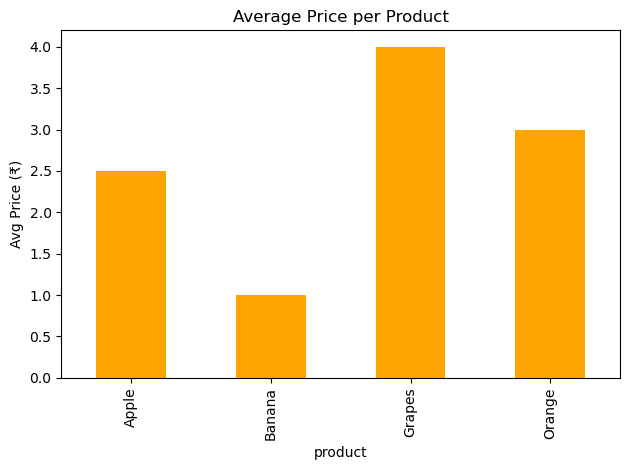

In [16]:
df_avg_price.plot(kind='bar', x='product', y='avg_price', title='Average Price per Product', legend=False, color='orange')
plt.ylabel("Avg Price (₹)")
plt.tight_layout()
plt.show()
